### What is Naive Bayes? 
__Naive Bayes__ is among one of the most simple and powerful algorithms for classification based on Bayes’ Theorem with an assumption of independence among predictors. Naive Bayes model is easy to build and particularly useful for very large data sets. There are __two parts__ to this algorithm:

- __Naive__
- __Bayes__

The Naive Bayes classifier assumes that the presence of a feature in a class is unrelated to any other feature. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that a particular fruit is an apple or an orange or a banana and that is why it is known as “Naive”. 


### What is Bayes Theorem?

In Statistics and probability theory, __Bayes__’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. It serves as a way to figure out conditional probability.

Given a Hypothesis __H__ and evidence __E__, Bayes’ Theorem states that the relationship between the probability of Hypothesis before getting the evidence __P(H)__ and the probability of the hypothesis after getting the evidence __P(H|E)__ is :

<img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/07/formula-528x90.png">


This relates the probability of the hypothesis before getting the evidence __P(H)__, to the probability of the hypothesis after getting the evidence, __P(H|E)__. For this reason,  is called the __prior probability__, while __P(H|E)__ is called the __posterior probability__. The factor that relates the two, __P(H|E) / P(E)__, is called the __likelihood ratio__. Using these terms, Bayes’ theorem can be rephrased as:


> __“The posterior probability equals the prior probability times the likelihood ratio.”__



In [1]:
# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('iris.csv')

In [3]:
#looking at the first 5 values of the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


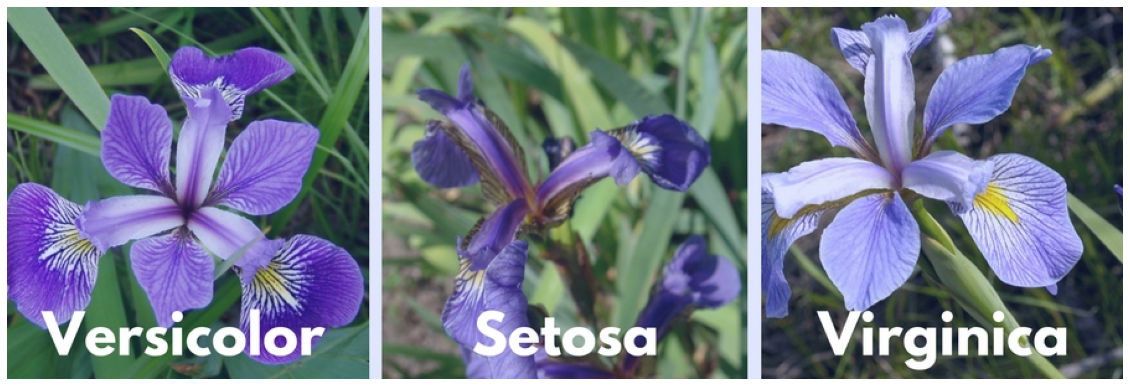

In [4]:
%matplotlib inline
img=mpimg.imread('iris_types.jpg')
plt.figure(figsize=(20,40))
plt.axis('off')
plt.imshow(img)

In [5]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:4].values
y = dataset['species'].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [7]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [9]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor']


In [10]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['virginica', 'virginica'],
       ['virginica', 'virginica'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa'],
       ['setosa', 'setosa']], dtype=object)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]


<AxesSubplot:>

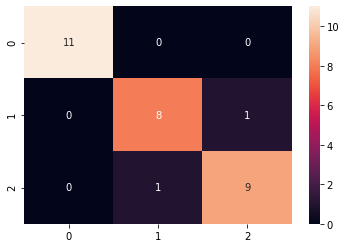

In [12]:
# Plotiing the confusin matrix using the seaborn
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot:>

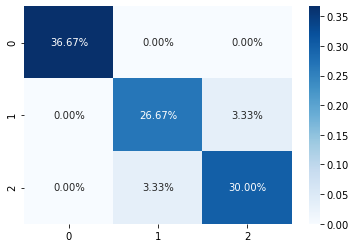

In [13]:
# percentage data representation in each quadrant

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [14]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))            


Correct predictions:  28
False predictions 2


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333
